# Decision Tree

#  1. Importing Required Libraries

In [254]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as classifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 2. Loading Data

In [255]:
data = pd.read_csv('https://raw.githubusercontent.com/Axelvel/DS50/main/Datasets/Datasets_Region_France_2016_2020.csv')

In [256]:
# load dataset
data =data[data['Regions']=='PACA']
# 12 Regions :
# Auvergne Rhone-Alpes - Bourgogne Franche-Comte - Bretagne - Centre Val de Loire - Grand Est - Hauts-de-France 
# Ile-de-France - Normandie - Nouvelle-Aquitaine - Occitanie - PACA - Pays de la Loire

#Les noms des colonnes
#Regions    Dates    Heures    Electricite    Gaz    Tmin    Tmax    Tmoy    Taux de Co2


In [257]:
data.replace(0,np.nan, inplace=True)
data.dropna(inplace=True)

In [258]:
data.head()

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
876960,PACA,01/01/2016,00:00,5858,2226,5.3,12.77,9.03,31
876961,PACA,01/01/2016,00:30,5477,2227,5.3,12.77,9.03,31
876962,PACA,01/01/2016,01:00,5278,2205,5.3,12.77,9.03,32
876963,PACA,01/01/2016,01:30,5262,2212,5.3,12.77,9.03,32
876964,PACA,01/01/2016,02:00,5154,2209,5.3,12.77,9.03,32


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87696 entries, 876960 to 964655
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Regions      87696 non-null  object 
 1   Dates        87696 non-null  object 
 2   Heures       87696 non-null  object 
 3   Electricite  87696 non-null  int64  
 4   Gaz          87696 non-null  int64  
 5   Tmin         87696 non-null  float64
 6   Tmax         87696 non-null  float64
 7   Tmoy         87696 non-null  float64
 8   Taux de Co2  87696 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.7+ MB


# 3. Create label encoder instance

In [260]:
lb = LabelEncoder() 

# Create Numerical labels for classes
data['Regions'] = lb.fit_transform(data['Regions'] ) 
data['Dates'] = lb.fit_transform(data['Dates']) 
data['Heures'] = lb.fit_transform(data['Heures'] )

In [261]:
#Display of dataset after encoding 
data.head()

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
876960,0,0,0,5858,2226,5.3,12.77,9.03,31
876961,0,0,1,5477,2227,5.3,12.77,9.03,31
876962,0,0,2,5278,2205,5.3,12.77,9.03,32
876963,0,0,3,5262,2212,5.3,12.77,9.03,32
876964,0,0,4,5154,2209,5.3,12.77,9.03,32


# Encoder par catégorie l'électricité

In [262]:
# Valeur maximum de la consommation d'électricité sur la plage sélectionnée
max_elec = max(data['Electricite'])
print('Max électricité : ', max_elec)

# Valeur minimum de la consommation d'électricité sur la plage sélectionnée
min_elec = min(data['Electricite'])
print('Min électricité : ', min_elec)

# Plage de donnée de la consommation d'électricité sur la plage sélectionnée
ecart = max_elec - min_elec
print('Plage de donnée : ', ecart)

Max électricité :  8331
Min électricité :  667
Plage de donnée :  7664


In [263]:
bins = np.arange(0, 14000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1,15,1)
data_elec = pd.cut(data['Electricite'], bins=bins, labels=labels)
print(bins)
print(labels)

[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000.    inf]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


#  Encoder par catégorie le gaz

In [264]:
# Valeur maximum de la consommation d'électricité sur la plage sélectionnée
max_gaz = max(data['Gaz'])
print('Max électricité : ', max_gaz)

# Valeur minimum de la consommation d'électricité sur la plage sélectionnée
min_gaz = min(data['Gaz'])
print('Min électricité : ', min_gaz)

# Plage de donnée de la consommation d'électricité sur la plage sélectionnée
ecart = max_gaz - min_gaz
print('Plage de donnée : ', ecart)

Max électricité :  9700
Min électricité :  234
Plage de donnée :  9466


In [265]:
bins = np.arange(0, 10000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1, 11, 1)
data_gaz = pd.cut(data['Gaz'], bins=bins, labels=labels)
print(bins)
print(labels)

[   0. 1000. 2000. 3000. 4000. 5000. 6000. 7000. 8000. 9000.   inf]
[ 1  2  3  4  5  6  7  8  9 10]


<AxesSubplot:>

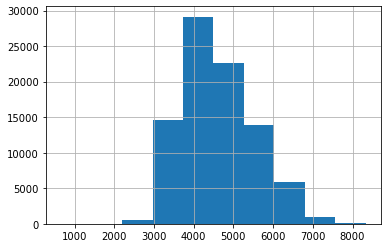

In [266]:
data['Electricite'].hist()

<AxesSubplot:>

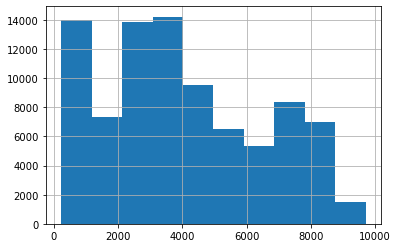

In [267]:
data['Gaz'].hist()

# 4. Construction du modèle et calcul des variables comparatives


# Cas A : calculs pour l'électrcité en prenant en paramètre le gaz

In [268]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures', 'Tmin', 'Tmoy','Taux de Co2']
Xe = data[feature_cols] # Features  
ye = data_elec # Target variable

In [269]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.2, random_state = 42) # 80% training and 20% test

In [270]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 184 ms


In [271]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))

print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.12 degrés


In [272]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?

print('Accuracy Score on test data: ',accuracy_score(y_train, pred_train)*100)
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test )*100)

Accuracy Score on test data:  100.0
Accuracy Score on test data:  88.05017103762827


# Cas B : calculs pour l'électrcité en ne prenant pas en paramètre le gaz

In [273]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures','Gaz', 'Tmin', 'Tmoy','Taux de Co2']
Xe = data[feature_cols] # Features  
ye = data_elec # Target variable

In [274]:

## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.2, random_state = 42) # 80% training and 20% test

In [275]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 269 ms


In [276]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.12 degrés


In [277]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?

print('Accuracy Score on test data: ',accuracy_score(y_train, pred_train)*100)
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test )*100)

Accuracy Score on test data:  100.0
Accuracy Score on test data:  87.61117445838084


# Cas C : calculs pour le gaz en prenant en paramètre l'électricité

In [278]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures','Electricite', 'Tmin', 'Tmax','Tmoy','Taux de Co2']

Xg = data[feature_cols] # Features  
yg = data_gaz # Target variable

In [279]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2, random_state = 42) # 80% training and 20% test

In [280]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 260 ms


In [281]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.19 degrés


In [282]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?

print('Accuracy Score on test data: ',accuracy_score(y_train, pred_train)*100)
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test )*100)

Accuracy Score on test data:  100.0
Accuracy Score on test data:  83.85404789053592


# Cas D : calculs pour le gaz en ne prenant pas en paramètre l'électricité

In [283]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures', 'Tmin', 'Tmax','Tmoy','Taux de Co2']

Xg = data[feature_cols] # Features  
yg = data_gaz # Target variable

In [284]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2, random_state = 42) # 80% training and 20% test

In [285]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 184 ms


In [286]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.15 degrés


In [287]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?

print('Accuracy Score on test data: ',accuracy_score(y_train, pred_train)*100)
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test )*100)

Accuracy Score on test data:  100.0
Accuracy Score on test data:  86.48232611174458


In [288]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_test)
cm


array([[2336,   87,    9,    2,    0,    1,    0,    0,    0,    0],
       [ 109, 1327,   88,   13,    9,    0,    1,    0,    0,    0],
       [   7,  105, 2496,  200,   14,    5,    1,    0,    1,    0],
       [   3,   13,  201, 2593,  176,   13,    2,    0,    1,    0],
       [   3,   11,   16,  179, 1623,  130,   12,    3,    0,    0],
       [   0,    2,    6,    7,  117, 1127,  100,    8,    0,    0],
       [   1,    0,    1,    3,    8,  104,  922,  127,    4,    0],
       [   0,    0,    0,    0,    0,    7,  116, 1584,  130,    1],
       [   0,    0,    0,    0,    0,    0,    4,  151, 1033,   26],
       [   0,    0,    0,    0,    0,    0,    0,    0,   33,  128]],
      dtype=int64)

# 5. Interprétation des résultats

# A. Features Importances Electricité

In [289]:
data_region = data.Regions
data_date = data.Dates
data_heure = data.Heures
data_electricite = data.Electricite
data_gaz = data.Gaz
data_Tmin = data.Tmin
data_Tmoy = data.Tmoy
data_Tmax = data.Tmax
data_CO2 = data['Taux de Co2']

# Encoder des varibles non numériques : Régions, Dates et Heures
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

encoded_region = labelEncoder.fit_transform(data_region)
encoded_date = labelEncoder.fit_transform(data_date)
encoded_heure = labelEncoder.fit_transform(data_heure)

In [290]:
bins = np.arange(0, 14000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1, 15, 1)
data_electricite = pd.cut(data['Electricite'], bins=bins, labels=labels)
print(bins)
print(labels)

[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000.    inf]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [291]:
features = [list(i) for i in zip (encoded_region, encoded_date, encoded_heure, data_electricite, data_gaz, data_Tmin, data_Tmoy, data_Tmax, data_CO2)]
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,data_electricite, test_size=0.2, random_state = 4) # 80% training and 20% test


In [292]:
clf = classifier(random_state=0,min_samples_leaf=50,max_depth=30)

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=0)

In [293]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99917850e-01,
       0.00000000e+00, 6.15345087e-06, 7.59964042e-05, 0.00000000e+00,
       0.00000000e+00])

In [294]:
pd.DataFrame(clf.feature_importances_,
              index = data.columns, 
              columns = ["Importance for electricity"]).sort_values("Importance for electricity", ascending = False)

,Importance for electricity
Electricite,0.999918
Tmax,0.000076
Tmin,0.000006
Regions,0.000000
Dates,0.000000
Heures,0.000000
Gaz,0.000000
Tmoy,0.000000
Taux de Co2,0.000000


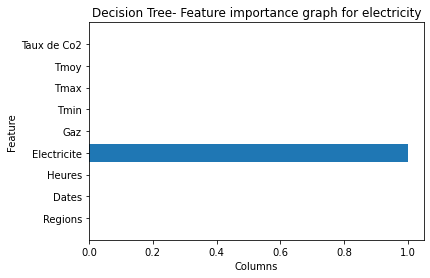

In [295]:
def plot_feature_importance(model):
  n_feature = len(data.columns)
  plt.barh(np.arange(n_feature), clf.feature_importances_)
  plt.yticks(np.arange(n_feature), data.columns)
  plt.title('Decision Tree- Feature importance graph for electricity')
  plt.xlabel("Columns")
  plt.ylabel("Feature")
  plt.ylim(-1, n_feature)

plot_feature_importance(clf)

# B. Features Importances Gaz

In [296]:
## Split dataset into training set and test set
features = [list(i) for i in zip (encoded_region, encoded_date, encoded_heure, data_electricite, data_gaz, data_Tmin, data_Tmoy, data_Tmax, data_CO2)]
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,data_gaz, test_size=0.2, random_state = 4) # 80% training and 20% test


In [297]:
clf = classifier(random_state=0,min_samples_leaf=50,max_depth=30)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=0)

In [298]:
df =pd.DataFrame({'Features_name':data.columns,'Importance for electricity':clf.feature_importances_})
df

,Features_name,Importance for electricity
0,Regions,0.000000
1,Dates,0.000606
2,Heures,0.000894
3,Electricite,0.000000
4,Gaz,0.997352
5,Tmin,0.000446
6,Tmax,0.000340
7,Tmoy,0.000148
8,Taux de Co2,0.000214


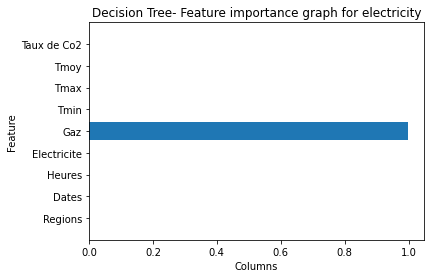

In [299]:
def plot_feature_importance(model):
  n_feature = len(data.columns)
  plt.barh(np.arange(n_feature), clf.feature_importances_)
  plt.yticks(np.arange(n_feature), data.columns)
  plt.title('Decision Tree- Feature importance graph for electricity')
  plt.xlabel("Columns")
  plt.ylabel("Feature")
  plt.ylim(-1, n_feature)

plot_feature_importance(clf)

In [300]:


path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

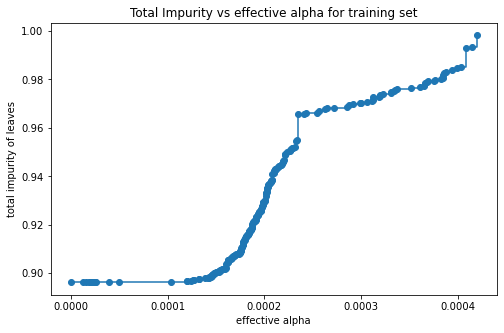

In [301]:


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")



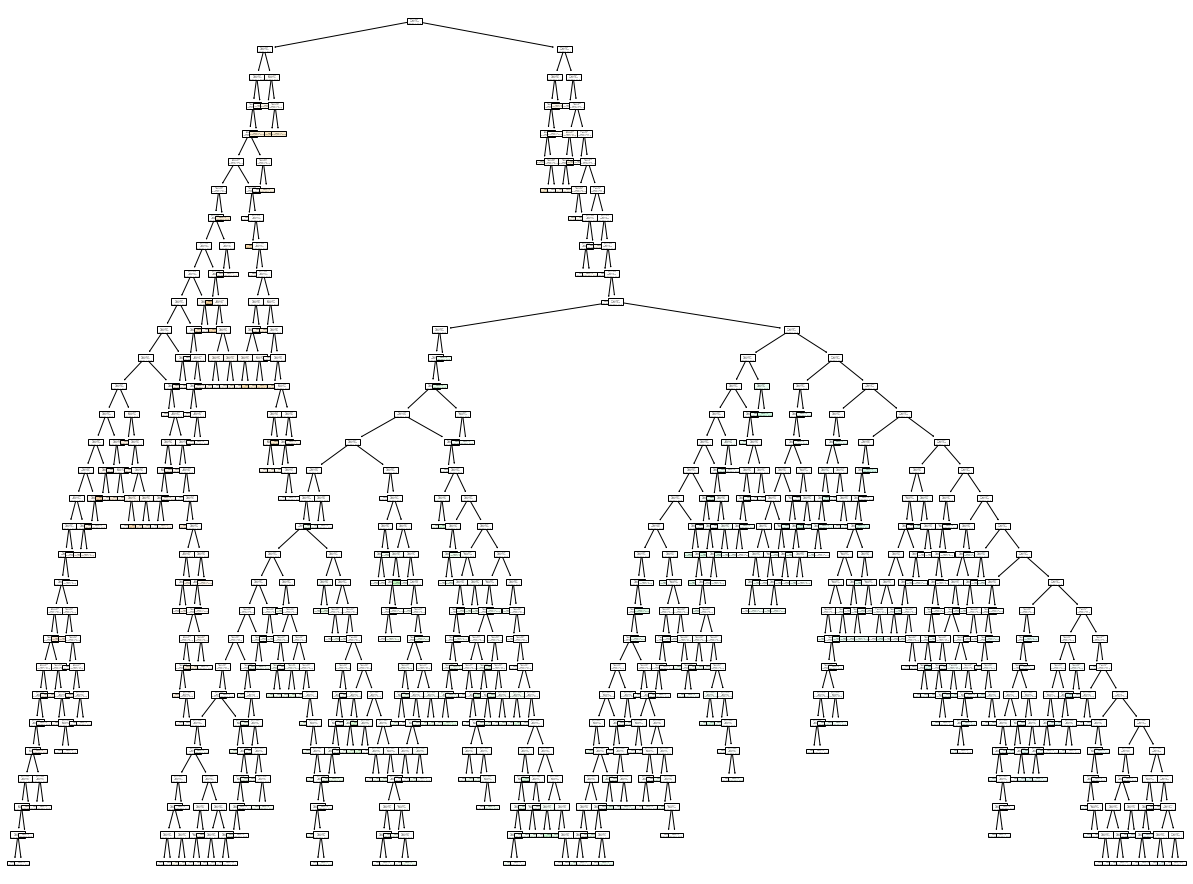

In [308]:
from sklearn import tree
plt.figure(figsize=(21,16))
tree.plot_tree(clf,filled=True)
plt.show()

[Text(230.54727636337282, 427.8658064516129, 'X[4] <= 700.5\ngini = 1.0\nsamples = 70156\nvalue = [2, 1, 1 ... 1, 1, 1]'),
 Text(144.83665832519532, 413.8374193548387, 'X[4] <= 694.5\ngini = 0.996\nsamples = 6822\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(140.65165832519534, 399.8090322580645, 'X[4] <= 691.5\ngini = 0.996\nsamples = 6635\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(138.55915832519534, 385.7806451612903, 'X[4] <= 689.5\ngini = 0.996\nsamples = 6545\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(136.46665832519534, 371.7522580645161, 'X[4] <= 683.5\ngini = 0.996\nsamples = 6488\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(128.55081665039063, 357.72387096774196, 'X[4] <= 632.5\ngini = 0.996\nsamples = 6343\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(118.99663330078127, 343.69548387096773, 'X[4] <= 630.5\ngini = 0.996\nsamples = 5046\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(116.90413330078127, 329.66709677419357, 'X[4] <= 625.5\ngini = 0.995\nsamples = 4991\nvalue = [2, 1, 1 ... 0, 0, 0]'),
 Text(

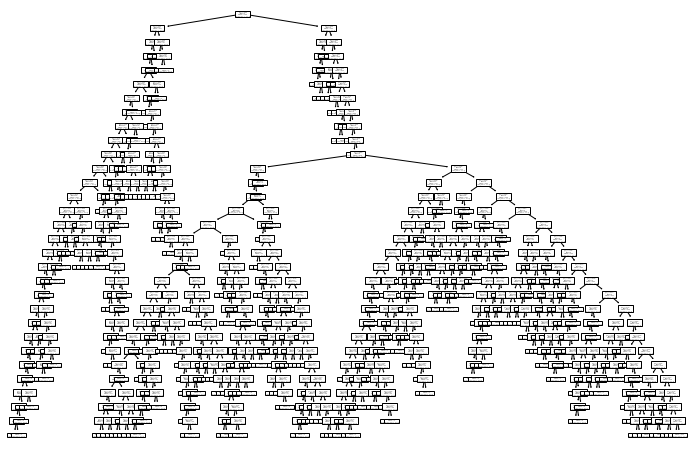

In [311]:


plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 

